
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Amirabbas Afzali <br> Adel Movahedian 400102074

____

# Personal Data

In [1]:
# Set your student number
student_number = '400102074'
Name = 'Adel'
Last_Name = 'Movahedain'

# Rules
- Make sure that all of your cells can be run perfectly. 
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens. 
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


Load `gpt2` model:

In [2]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model
import torch
from torch import nn


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
model = GPT2LMHeadModel.from_pretrained("gpt2").to("cuda")

prompt = "Deep learning is fun so "
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
outputs = model.generate(
    inputs["input_ids"], 
    attention_mask=inputs["attention_mask"], 
    max_length=20,
    pad_token_id=tokenizer.pad_token_id
)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Text: {generated_text}")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Generated Text: Deep learning is fun so  I'm going to try to make it fun for you.



In [3]:
def generate_text(prompt, temperature=1.0, top_k=50, top_p=0.9, repetition_penalty=1.0, num_beams=1, no_repeat_ngram_size=0):
    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to("cuda")
    outputs = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=20,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        repetition_penalty=repetition_penalty,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size,
        pad_token_id=tokenizer.pad_token_id
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)  
prompts = ["The wild", "In a distant galaxy"]
for prompt in prompts:
    print(f"Prompt: {prompt}")
    print("Default settings:", generate_text(prompt),"\n ")
    print("High creativity (Temperature=1.5):", generate_text(prompt, temperature=1.5),"\n ")
    print("Focused generation (Top-k=10):", generate_text(prompt, top_k=10),"\n ")
    print("Diverse sampling (Top-p=0.7):", generate_text(prompt, top_p=0.7),"\n ")
    print("Avoid repetition (Repetition Penalty=2.0):", generate_text(prompt, repetition_penalty=2.0),"\n ")
    print("Beam search (Num beams=3):", generate_text(prompt, num_beams=3))
    print("---------------------------------------------------------------------------------------------------------------------")


Prompt: The wild
Default settings: The wild card is the fact that the team is in the midst of a three-game losing streak 
 


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


High creativity (Temperature=1.5): The wild card is the fact that the team is in the midst of a three-game losing streak 
 
Focused generation (Top-k=10): The wild card is the fact that the team is in the midst of a three-game losing streak 
 


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:589: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `10` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Diverse sampling (Top-p=0.7): The wild card is the fact that the team is in the midst of a three-game losing streak 
 
Avoid repetition (Repetition Penalty=2.0): The wild card is the fact that he's a former NFL player. He was drafted by Seattle in 
 
Beam search (Num beams=3): The wild card is that it's not clear how much of an impact it will have.


---------------------------------------------------------------------------------------------------------------------
Prompt: In a distant galaxy
Default settings: In a distant galaxy, the galaxy is a vast, vast, vast, vast, vast, vast 
 
High creativity (Temperature=1.5): In a distant galaxy, the galaxy is a vast, vast, vast, vast, vast, vast 
 
Focused generation (Top-k=10): In a distant galaxy, the galaxy is a vast, vast, vast, vast, vast, vast 
 
Diverse sampling (Top-p=0.7): In a distant galaxy, the galaxy is a vast, vast, vast, vast, vast, vast 
 
Avoid repetition (Repetition Penalty=2.0): In a distant galaxy, the Milky Way is home t

Load `sst-2` dataset:

In [4]:
from datasets import load_dataset

# Load the SST-2 dataset from Hugging Face 
dataset = load_dataset("glue", "sst2")

def preprocess_func(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(preprocess_func, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["sentence", "idx"]) #only tokenized features are kept here
tokenized_dataset = tokenized_dataset.with_format("torch")
train_dataset = tokenized_dataset["train"]
val_dataset = tokenized_dataset["validation"]
test_dataset = tokenized_dataset["test"]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

go ahead:

Epoch 1, Loss: 0.6592, Accuracy: 0.5934
Epoch 2, Loss: 0.6283, Accuracy: 0.6269
Epoch 3, Loss: 0.6189, Accuracy: 0.6342


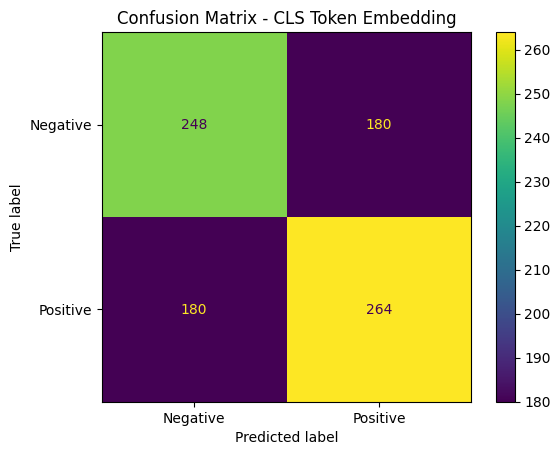

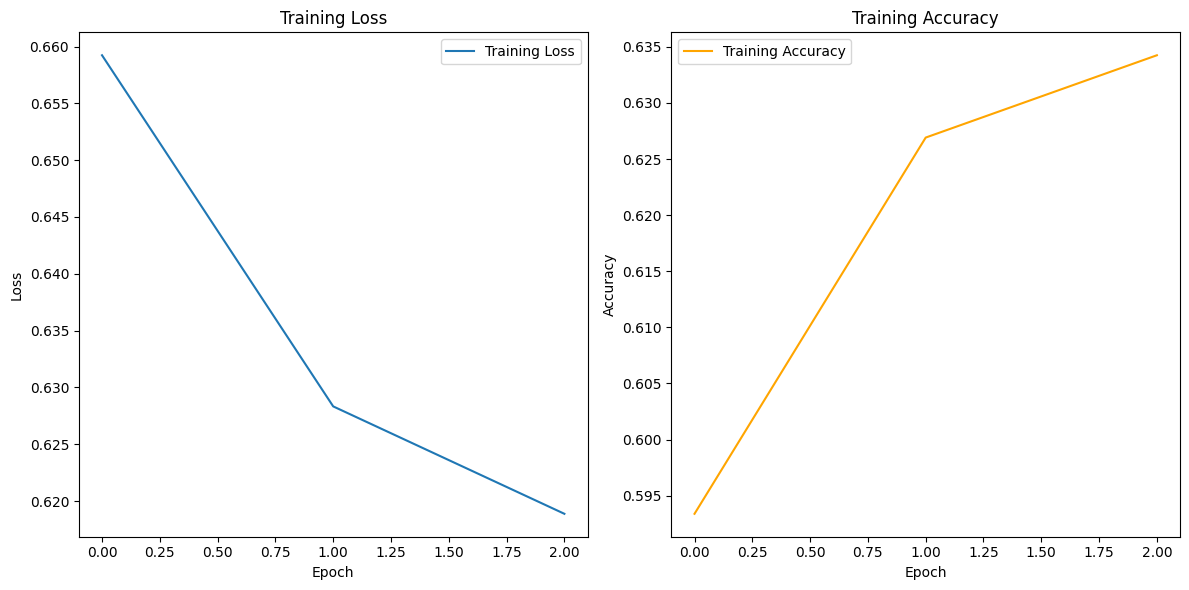

In [5]:
# Section 4
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

class GPT2Classifier(nn.Module):
    def __init__(self, model):
        super(GPT2Classifier, self).__init__()
        self.gpt2 = model.transformer
        self.cls_token_embedding = nn.Linear(model.config.n_embd, 2)
    def forward(self, input_ids, attention_mask):
        outputs = self.gpt2(input_ids, attention_mask=attention_mask)
        cls_embedding = outputs.last_hidden_state[:, 0, :]
        return self.cls_token_embedding(cls_embedding)
classifier = GPT2Classifier(model).to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(classifier.parameters(), lr=5e-5) 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset,batch_size=32)
def train_model(model, dataloader, optimizer, criterion, epochs=3):
    model.train()
    training_loss = []
    training_accuracy = []
    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        for batch in dataloader:
            optimizer.zero_grad()
            inputs = batch['input_ids'].to("cuda")
            attention_mask = batch['attention_mask'].to("cuda")
            labels = batch['label'].to("cuda")

            outputs = model(inputs, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()
            total_predictions += labels.size(0)

        accuracy = correct_predictions / total_predictions
        training_loss.append(total_loss / len(dataloader))
        training_accuracy.append(accuracy)
        print(f"Epoch {epoch + 1}, Loss: {training_loss[-1]:.4f}, Accuracy: {accuracy:.4f}")
    return training_loss, training_accuracy
training_loss, training_accuracy = train_model(classifier, train_loader, optimizer, criterion)    
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch['input_ids'].to("cuda")
            attention_mask = batch['attention_mask'].to("cuda")
            labels = batch['label'].to("cuda")
            outputs = model(inputs, attention_mask)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)
preds, labels = evaluate_model(classifier, val_loader)
cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix - CLS Token Embedding")
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label="Training Accuracy", color="orange")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1, Loss: 0.6152, Accuracy: 0.6368
Epoch 2, Loss: 0.6113, Accuracy: 0.6400
Epoch 3, Loss: 0.6081, Accuracy: 0.6401


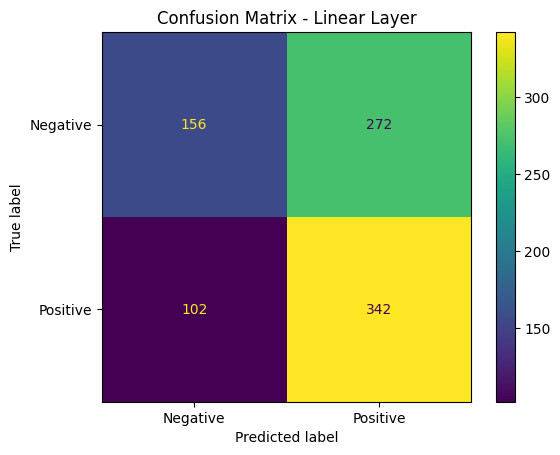

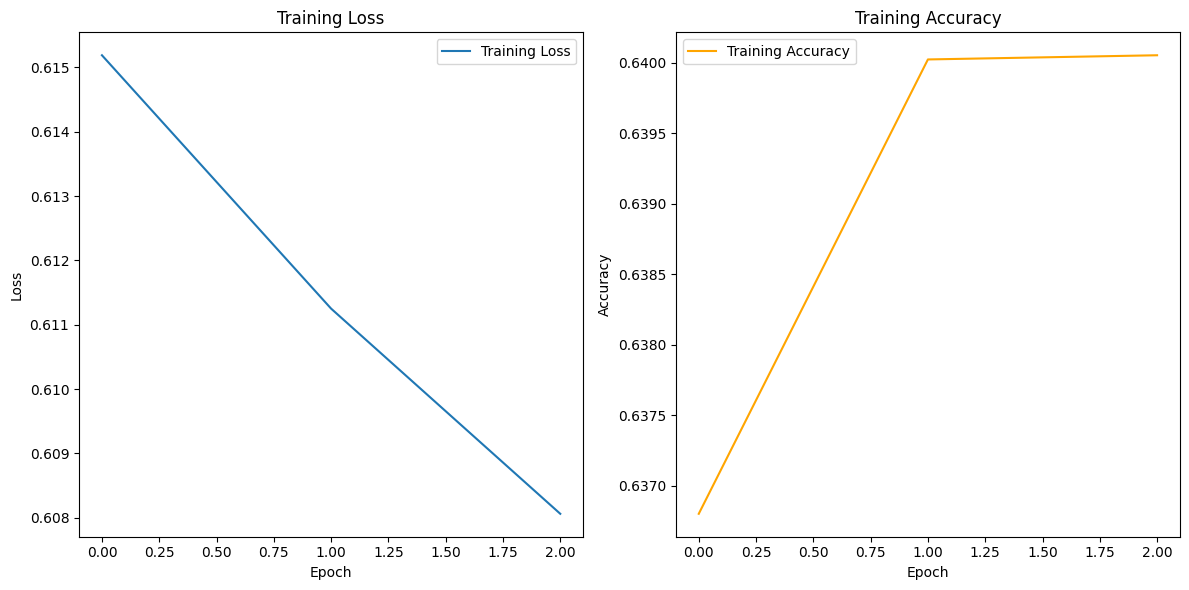

In [6]:
# Section 5
class GPT2WithLinearLayer(nn.Module):
    def __init__(self, model):
        super(GPT2WithLinearLayer, self).__init__()
        self.gpt2 = model.transformer
        self.linear = nn.Linear(model.config.n_embd, model.config.n_embd)
        self.classifier = nn.Linear(model.config.n_embd, 2)
    def forward(self, input_ids, attention_mask):
        outputs = self.gpt2(input_ids, attention_mask=attention_mask)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token
        enhanced_embedding = self.linear(cls_embedding)
        return self.classifier(enhanced_embedding)

classifier_with_linear = GPT2WithLinearLayer(model).to("cuda")
optimizer = torch.optim.AdamW(classifier_with_linear.parameters(), lr=5e-5)
training_loss, training_accuracy = train_model(classifier_with_linear, train_loader, optimizer, criterion)
preds, labels = evaluate_model(classifier_with_linear, val_loader)
cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix - Linear Layer")
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label="Training Accuracy", color="orange")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1, Loss: 0.3312, Accuracy: 0.8548
Epoch 2, Loss: 0.2293, Accuracy: 0.9069
Epoch 3, Loss: 0.1753, Accuracy: 0.9306


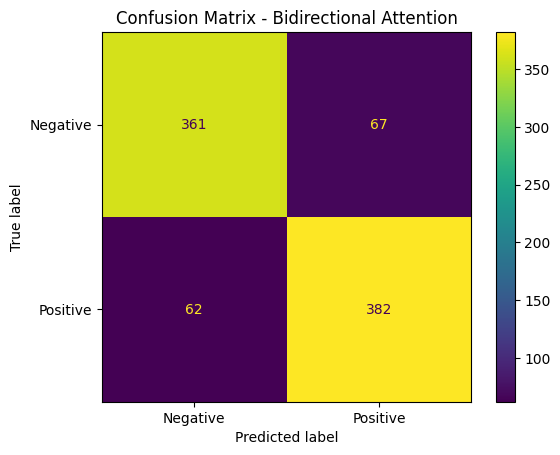

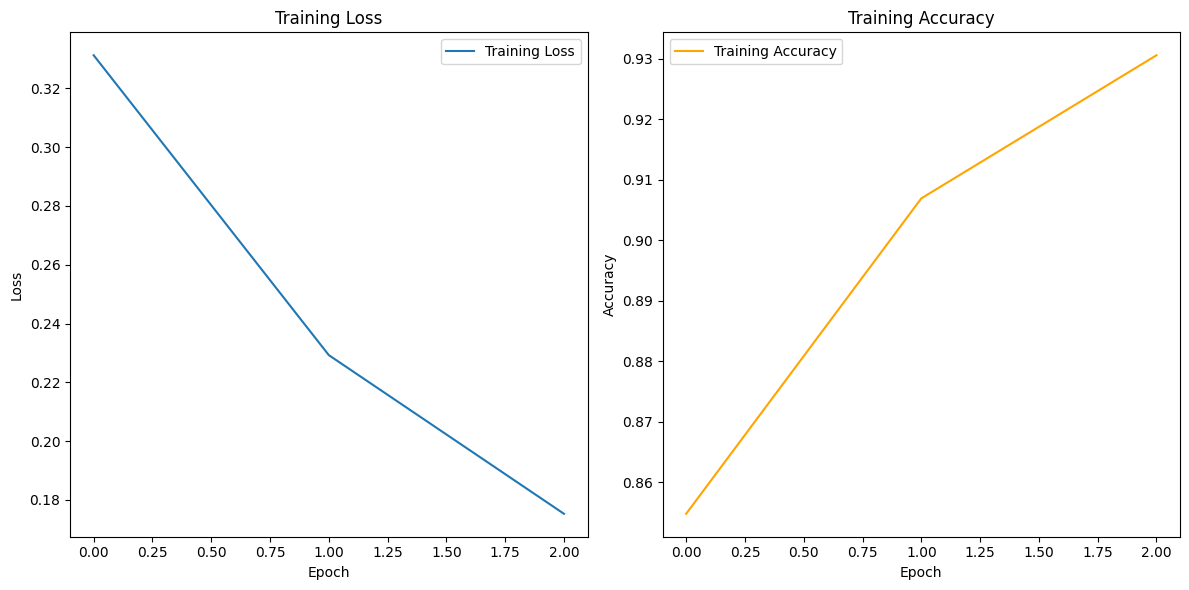

In [7]:
# Section 6
class GPT2WithBidirectionalAttention(nn.Module):
    def __init__(self, model, num_heads=12):
        super(GPT2WithBidirectionalAttention, self).__init__()
        self.gpt2 = model.transformer
        self.multihead_attention = nn.MultiheadAttention(model.config.n_embd, num_heads)
        self.classifier = nn.Linear(model.config.n_embd, 2)

    def forward(self, input_ids, attention_mask):
        outputs = self.gpt2(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state.permute(1, 0, 2)  # needed shape for attention layer
        attention_output, _ = self.multihead_attention(embeddings, embeddings, embeddings)
        cls_embedding = attention_output[0, :, :]
        return self.classifier(cls_embedding)

classifier_with_bidirectional_attention = GPT2WithBidirectionalAttention(model).to("cuda")
optimizer = torch.optim.AdamW(classifier_with_bidirectional_attention.parameters(), lr=5e-5)
training_loss , training_accuracy = train_model(classifier_with_bidirectional_attention, train_loader, optimizer, criterion)
preds, labels = evaluate_model(classifier_with_bidirectional_attention, val_loader)

cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix - Bidirectional Attention")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label="Training Accuracy", color="orange")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1, Loss: 0.1762, Accuracy: 0.9385
Epoch 2, Loss: 0.1261, Accuracy: 0.9520
Epoch 3, Loss: 0.1063, Accuracy: 0.9597


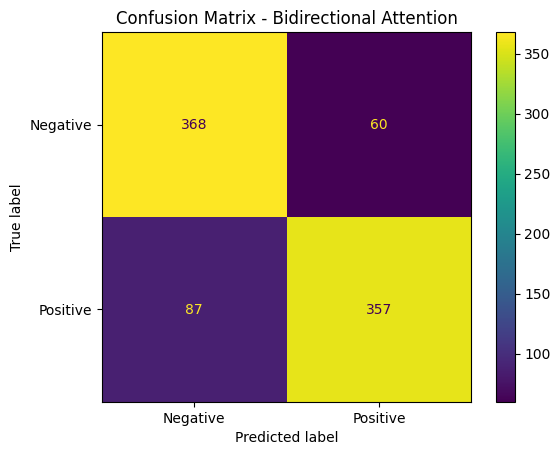

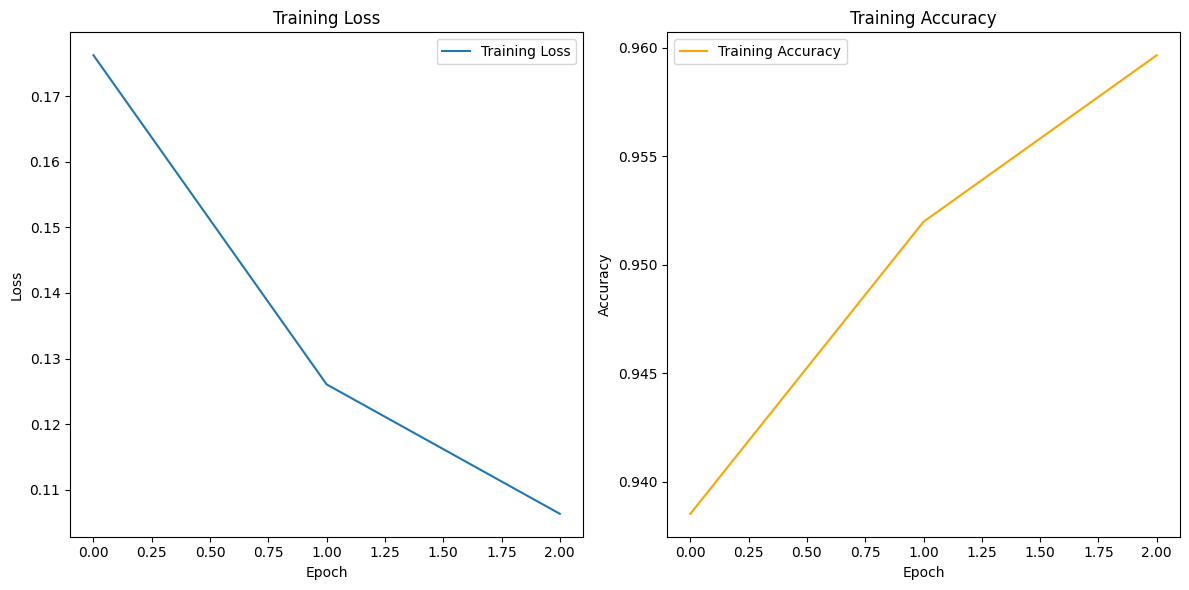

In [8]:
# Section 7
class GPT2WithTwoUnidirectionalAttention(nn.Module):
    def __init__(self, model):
        super(GPT2WithTwoUnidirectionalAttention, self).__init__() 
        self.gpt2 = model.transformer 
        self.left_to_right = nn.Linear(model.config.n_embd, model.config.n_embd)
        self.right_to_left = nn.Linear(model.config.n_embd, model.config.n_embd)
        self.classifier = nn.Linear(model.config.n_embd * 2, 2)
    def forward(self, input_ids, attention_mask):
        outputs = self.gpt2(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state
    
        seq_len = embeddings.size(1)
        batch_size = embeddings.size(0)
    
        left_to_right_mask = (
            torch.tril(torch.ones(seq_len, seq_len)).to(embeddings.device)
            .unsqueeze(0)
            .expand(batch_size, -1, -1)
        )
    
        right_to_left_mask = (
            torch.triu(torch.ones(seq_len, seq_len)).to(embeddings.device)
            .unsqueeze(0)
            .expand(batch_size, -1, -1)
        )
    
        left_to_right_output = torch.bmm(left_to_right_mask, embeddings) 
        right_to_left_output = torch.bmm(right_to_left_mask, embeddings)
    
        left_to_right_output = self.left_to_right(left_to_right_output)
        right_to_left_output = self.right_to_left(right_to_left_output)
        combined_output = torch.cat(
            (left_to_right_output[:, 0, :], right_to_left_output[:, 0, :]), dim=1
        )
        return self.classifier(combined_output)
classifier_two_direction = GPT2WithTwoUnidirectionalAttention(model).to("cuda")

optimizer = torch.optim.AdamW(classifier_two_direction.parameters(), lr=5e-5)
training_loss, training_accuracy = train_model(classifier_two_direction, train_loader, optimizer, criterion)
preds, labels = evaluate_model(classifier_two_direction, val_loader)

cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix - Bidirectional Attention")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label="Training Accuracy", color="orange")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
!pip install transformers evaluate

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Zero-shot performance (Accuracy): 0.9243


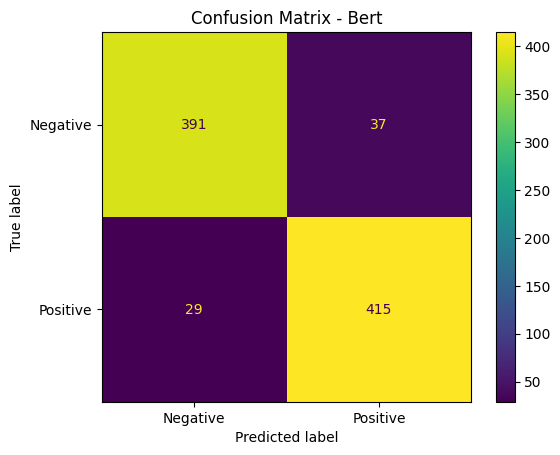

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import evaluate
from torch.utils.data import DataLoader
model_name = "textattack/bert-base-uncased-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
def preprocess_func(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)
tokenized_dataset = dataset.map(preprocess_func, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["sentence", "idx"])
tokenized_dataset = tokenized_dataset.with_format("torch")
val_dataset = tokenized_dataset["validation"]
from torch.utils.data import DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=16)
model.eval()
def predict(model, dataloader):
    predictions = []
    true_labels = []
    for batch in dataloader:
        input_ids = batch["input_ids"]
        attention_mask = batch["attention_mask"]
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.tolist())
        true_labels.extend(batch["label"].tolist())
    
    return predictions, true_labels
val_dataloader = DataLoader(val_dataset, batch_size=16)
preds, true_labels = predict(model, val_dataloader)
accuracy_metric = evaluate.load("accuracy")
accuracy = accuracy_metric.compute(predictions=preds, references=true_labels)
print(f"Zero-shot performance (Accuracy): {accuracy['accuracy']:.4f}")
cm = confusion_matrix(true_labels, preds)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot()
plt.title("Confusion Matrix - Bert")
plt.show()

---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**